In [76]:
import numpy as np
import pandas as pd 
import requests
import xlsxwriter
import math
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import TimeFrame 
%matplotlib inline
import pandas_ta as pta
import DateTime
from datetime import date, timedelta

In [2]:
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [77]:
load_dotenv()
api_key = os.getenv('ALPACA_API_KEY')
api_secret = os.getenv('ALPACA_SECRET_KEY')


yesterday_date = date.today() - timedelta(1)

print(yesterday_date)

2022-09-30


In [79]:
base_url = 'https://paper-api.alpaca.markets'

api = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')

account = api.get_account()


# api.get_portfolio_history(date_start=None, date_end=None, period=None, timeframe=None, extended_hours=None)


# Create the Alpaca API object
# YOUR CODE HERE!
ETH_price = api.get_crypto_bars('ETHUSD',  TimeFrame.Day, "2010-06-08", yesterday_date)
ETH_df = ETH_price.df

ETH_df.tail()

,exchange,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2022-09-29 05:00:00+00:00,ERSX,1342.53,1349.63,1289.58,1326.18,1346.364223,309,1327.355385
2022-09-29 05:00:00+00:00,FTXU,1341.80,1352.90,1287.20,1328.50,85850.336000,38650,1325.077029
2022-09-30 05:00:00+00:00,CBSE,1328.54,1373.46,1315.00,1329.00,379867.670201,425669,1339.895294
2022-09-30 05:00:00+00:00,ERSX,1331.06,1372.56,1315.07,1329.88,1818.861066,532,1345.633777
2022-09-30 05:00:00+00:00,FTXU,1328.50,1373.60,1309.80,1328.90,61372.641000,42117,1339.683789


In [80]:
ETH_df = ETH_df.drop(columns=["open","high","low","volume","trade_count","vwap"])


In [81]:
ETH_df = ETH_df[ETH_df['exchange'].str.contains("ERSX|FTXU")==False]


ETH_df.head()

,exchange,close
timestamp,,
2016-05-17 05:00:00+00:00,CBSE,14.00
2016-05-18 05:00:00+00:00,CBSE,13.18
2016-05-19 05:00:00+00:00,CBSE,14.82
2016-05-20 05:00:00+00:00,CBSE,14.17
2016-05-23 05:00:00+00:00,CBSE,13.74


In [82]:
ETH_df["Actual Returns"] = ETH_df["close"].pct_change()

In [83]:
ETH_df = ETH_df.dropna()

In [84]:
ETH_df

,exchange,close,Actual Returns
timestamp,,,
2016-05-18 05:00:00+00:00,CBSE,13.18,-0.058571
2016-05-19 05:00:00+00:00,CBSE,14.82,0.124431
2016-05-20 05:00:00+00:00,CBSE,14.17,-0.043860
2016-05-23 05:00:00+00:00,CBSE,13.74,-0.030346
2016-05-24 05:00:00+00:00,CBSE,12.94,-0.058224
...,...,...,...
2022-09-26 05:00:00+00:00,CBSE,1380.58,0.066711
2022-09-27 05:00:00+00:00,CBSE,1283.86,-0.070058
2022-09-28 05:00:00+00:00,CBSE,1341.36,0.044787


In [85]:
ETH_df["RSI EMA"] = pta.rsi(ETH_df['close'], length = 30)
ETH_df["RSI Drift"] = pta.rsi(ETH_df['close'], length = 30, drift = 10)

In [86]:
ETH_df = ETH_df.dropna()

In [87]:
ETH_df    

,exchange,close,Actual Returns,RSI EMA,RSI Drift
timestamp,,,,,
2016-06-28 05:00:00+00:00,CBSE,12.23,-0.124553,45.779760,45.191366
2016-06-29 05:00:00+00:00,CBSE,12.70,0.038430,46.987372,45.886696
2016-06-30 05:00:00+00:00,CBSE,12.32,-0.029921,46.128081,46.348415
2016-07-01 05:00:00+00:00,CBSE,12.14,-0.014610,45.718384,44.625139
2016-07-02 05:00:00+00:00,CBSE,12.09,-0.004119,45.601998,43.459800
...,...,...,...,...,...
2022-09-26 05:00:00+00:00,CBSE,1380.58,0.066711,45.105937,30.288123
2022-09-27 05:00:00+00:00,CBSE,1283.86,-0.070058,42.576306,29.453016
2022-09-28 05:00:00+00:00,CBSE,1341.36,0.044787,44.490839,29.870477


In [88]:
ETH_df["Signal"] = 0.0


ETH_df.loc[(ETH_df["Actual Returns"] >= 0), 'Signal'] = 1
ETH_df.loc[(ETH_df["Actual Returns"] < 0), 'Signal'] = -1



def buy_order(rsi, signal):
    if rsi >= 70 and singal = 1:
    submit sell order
    if rsi <= 30 and singal = -1:
    sumbit buy order
    if rsi 

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [89]:
ETH_df

,exchange,close,Actual Returns,RSI EMA,RSI Drift,Signal
timestamp,,,,,,
2016-06-28 05:00:00+00:00,CBSE,12.23,-0.124553,45.779760,45.191366,-1.0
2016-06-29 05:00:00+00:00,CBSE,12.70,0.038430,46.987372,45.886696,1.0
2016-06-30 05:00:00+00:00,CBSE,12.32,-0.029921,46.128081,46.348415,-1.0
2016-07-01 05:00:00+00:00,CBSE,12.14,-0.014610,45.718384,44.625139,-1.0
2016-07-02 05:00:00+00:00,CBSE,12.09,-0.004119,45.601998,43.459800,-1.0
...,...,...,...,...,...,...
2022-09-26 05:00:00+00:00,CBSE,1380.58,0.066711,45.105937,30.288123,1.0
2022-09-27 05:00:00+00:00,CBSE,1283.86,-0.070058,42.576306,29.453016,-1.0
2022-09-28 05:00:00+00:00,CBSE,1341.36,0.044787,44.490839,29.870477,1.0


In [90]:
ETH_df['Strategy Returns'] = ETH_df['Actual Returns'] * ETH_df['Signal'].shift()

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
ETH_df

,exchange,close,Actual Returns,RSI EMA,RSI Drift,Signal,Strategy Returns
timestamp,,,,,,,
2016-06-28 05:00:00+00:00,CBSE,12.23,-0.124553,45.779760,45.191366,-1.0,NaN
2016-06-29 05:00:00+00:00,CBSE,12.70,0.038430,46.987372,45.886696,1.0,-0.038430
2016-06-30 05:00:00+00:00,CBSE,12.32,-0.029921,46.128081,46.348415,-1.0,-0.029921
2016-07-01 05:00:00+00:00,CBSE,12.14,-0.014610,45.718384,44.625139,-1.0,0.014610
2016-07-02 05:00:00+00:00,CBSE,12.09,-0.004119,45.601998,43.459800,-1.0,0.004119
...,...,...,...,...,...,...,...
2022-09-26 05:00:00+00:00,CBSE,1380.58,0.066711,45.105937,30.288123,1.0,-0.066711
2022-09-27 05:00:00+00:00,CBSE,1283.86,-0.070058,42.576306,29.453016,-1.0,-0.070058
2022-09-28 05:00:00+00:00,CBSE,1341.36,0.044787,44.490839,29.870477,1.0,-0.044787


<AxesSubplot:xlabel='timestamp'>

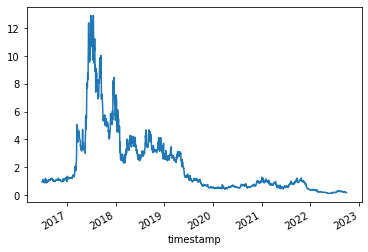

In [92]:
(1 + ETH_df['Strategy Returns']).cumprod().plot()

In [93]:
X = ETH_df[["RSI EMA","RSI Drift" ]].shift().dropna()

In [94]:
y = ETH_df['Signal']

In [95]:
training_begin = X.index.min()
print(training_begin)

2016-06-29 05:00:00+00:00


In [96]:
training_end = X.index.min() + DateOffset(months=24)
print(training_end)

2018-06-29 05:00:00+00:00


In [97]:
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]


In [98]:
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

In [99]:
scaler = StandardScaler()


X_scaler = scaler.fit(X_train)


X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [100]:
from sklearn import svm

In [101]:
svm_model =svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_train_scaled)

# Review the model's predicted values
svm_pred[:10]


array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [102]:
svm_testing_report = classification_report(y_train, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.55      0.63      0.58       357
         1.0       0.58      0.50      0.54       374

    accuracy                           0.56       731
   macro avg       0.56      0.56      0.56       731
weighted avg       0.57      0.56      0.56       731



In [103]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [104]:
 # Evaluate the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.51      0.65      0.57       764
         1.0       0.54      0.39      0.45       790

    accuracy                           0.52      1554
   macro avg       0.52      0.52      0.51      1554
weighted avg       0.52      0.52      0.51      1554



In [105]:
from sklearn.ensemble import BaggingClassifier

In [106]:
bc_model = BaggingClassifier()
 
# Fit the model to the data using the training data
bc_model = bc_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
bc_pred = bc_model.predict(X_train_scaled)

# Review the model's predicted values
bc_pred[:10]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.])

In [107]:
bc_testing_report = classification_report(y_train, svm_pred)

# Print the classification report
print(bc_testing_report)

              precision    recall  f1-score   support

        -1.0       0.55      0.63      0.58       357
         1.0       0.58      0.50      0.54       374

    accuracy                           0.56       731
   macro avg       0.56      0.56      0.56       731
weighted avg       0.57      0.56      0.56       731



In [108]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = bc_model.predict(X_test_scaled)

In [109]:
 # Evaluate the model's ability to predict the trading signal for the testing data
bc_testing_report = classification_report(y_test, testing_signal_predictions)
print(bc_testing_report)

              precision    recall  f1-score   support

        -1.0       0.50      0.57      0.53       764
         1.0       0.52      0.45      0.48       790

    accuracy                           0.51      1554
   macro avg       0.51      0.51      0.51      1554
weighted avg       0.51      0.51      0.51      1554



In [110]:
from sklearn.ensemble import AdaBoostClassifier

In [111]:
ABC_model = AdaBoostClassifier()
 
# Fit the model to the data using the training data
ABC_model = ABC_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
ABC_pred = ABC_model.predict(X_train_scaled)

# Review the model's predicted values
ABC_pred[:10]


array([-1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.])

In [112]:
ABC_testing_report = classification_report(y_train, svm_pred)

# Print the classification report
print(ABC_testing_report)

              precision    recall  f1-score   support

        -1.0       0.55      0.63      0.58       357
         1.0       0.58      0.50      0.54       374

    accuracy                           0.56       731
   macro avg       0.56      0.56      0.56       731
weighted avg       0.57      0.56      0.56       731



In [113]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = ABC_model.predict(X_test_scaled)

In [114]:
 # Evaluate the model's ability to predict the trading signal for the testing data
ABC_testing_report = classification_report(y_test, testing_signal_predictions)
print(ABC_testing_report)

              precision    recall  f1-score   support

        -1.0       0.52      0.55      0.53       764
         1.0       0.54      0.51      0.52       790

    accuracy                           0.53      1554
   macro avg       0.53      0.53      0.53      1554
weighted avg       0.53      0.53      0.53      1554



In [125]:
def get_dataframe(raw_data):
    raw_data.drop(columns=["open","high","low","volume","trade_count","vwap"])
    return raw_data
    
    

In [126]:
get_dataframe(ETH_df)

KeyError: "['open' 'high' 'low' 'volume' 'trade_count' 'vwap'] not found in axis"